In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('SM_Thermo.dat', sep='\s+\\s+')
df.to_csv ('SM_Thermo.csv', index=None)

C:\Users\ashish\AppData\Local\Temp\ipykernel_17168\3188559864.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('SM_Thermo.dat', sep='\s+\\s+')


In [3]:
z_gam=df["z_gam"]
z_nu=df["z_nu"]
gs=df["gs"]
g=df["g*"]
m_e=0.511
m_p=1.2*10**(22)

Text(0.5, 1.0, 't (s) vs $ z_{\\gamma}$')

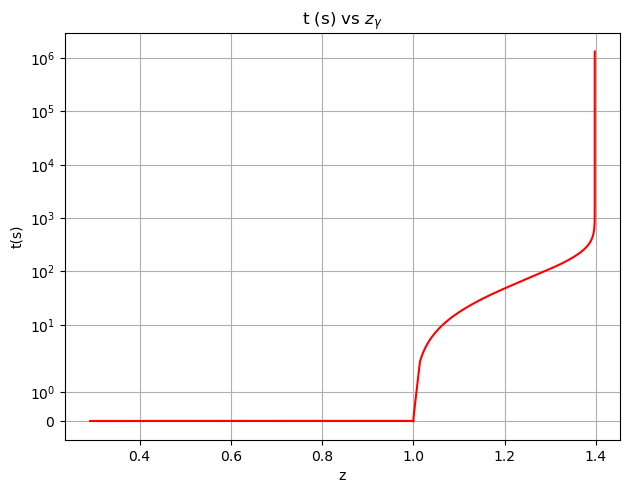

In [16]:
plt.plot(z_gam,df["t (s)"],color='red')

plt.yscale('symlog')
#plt.xscale('symlog')
plt.xlabel("z")
plt.ylabel("t(s)")
plt.tight_layout()
plt.grid("True")
plt.title(r't (s) vs $ z_{\gamma}$')

#### 1. Plotting:  $\frac{dt}{dz}=\frac{\bigg(-z^{2}\frac{1}{3}\frac{g'_{s}(z)}{g_{s}(z)}+z\bigg)}{1.66 \sqrt{g_{\ast}(z)}}\frac{m_{pl}}{m_{e}^{2}}$

* We will now approximate the value of $g'_{s}(z)$ for $z_{\gamma}$ using the finite difference method or discrete derivative technique. This involves taking the difference between two successive values of $z_{g}$ from the data file. Since $\Delta z_{g} \rightarrow 0$, this approximation is reasonably accurate.

* The formula for approximating $g'_{s}(z)$ is given by: $g'_{s}(z) = \frac{g_{s}(z_{g}[i+1])-g_{s}(z_{g}[i])}{z_g[i+1]-z_g[i]}$

* $cons=\frac{m_{pl}}{m_{e}^{2}}=\frac{1.22 \times 10^{22}}{(0.511)^{2}}=1.22\times10^{22}/(0.511)^2$ (MeV) 

In [7]:
z_g=np.multiply(df['z_gam'],df['a'])

In [8]:
def gprime_s(df):
    x=[]
    for i in range(0,1000,1):
        if(z_g[i+1]!=z_g[i]):
            x.append((df["gs"][i+1]-df["gs"][i])/(z_g[i+1]-z_g[i]))
        else:
            x.append(x[i-1])
    return x

In [11]:
x=gprime_s(df)
x.append(0)
    

#### 1.2 Plot of $g^{\prime}_{s}(z)$ with respect to $z_{\gamma}$

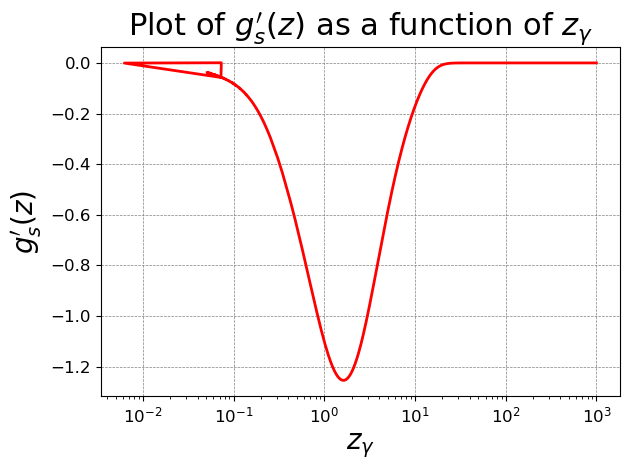

In [32]:
plt.plot(z_g, x, color='red', linewidth=2)
plt.xscale('log')
plt.xlabel(r'$z_\gamma$', fontsize=20)
plt.ylabel(r'$g^{\prime}_{s}(z)$', fontsize=20)
plt.title(r'Plot of $g^{\prime}_{s}(z)$ as a function of $z_\gamma$', fontsize=22)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()

In [17]:
cons=1.22*10**(22)/(0.511)**2

In [18]:
func=cons*((z_g**(2))*1/3*np.divide(x,df['gs'])+z_g)/(1.66*np.sqrt(df['g*']))

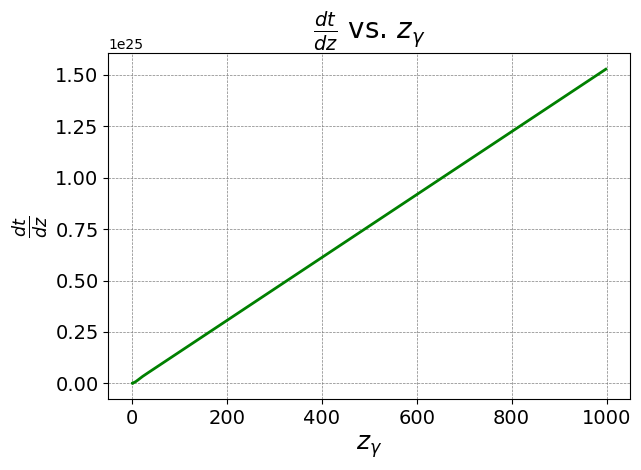

In [31]:
plt.plot(z_g, func, color='green', linewidth=2)
plt.ylabel(r'$\frac{dt}{dz}$', fontsize=18)
plt.xlabel(r'$z_{\gamma}$', fontsize=18)
plt.title(r'$\frac{dt}{dz}$ vs. $z_{\gamma}$', fontsize=20)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

* Method 2: In this approach, we will attempt to interpolate the function $g_{s}(z)$. By doing so, we can then utilize the finite difference of the interpolated function to obtain the desired result. Interpolation allows us to estimate the values of the function at intermediate points where the discrete values are not explicitly provided.


In [20]:
from scipy import interpolate

In [22]:
f=interpolate.interp1d(z_g,gs)

In [23]:
min(z_g)

0.00624792643863175

In [24]:
max(z_g)

998.5341722419439

In [25]:
x_new=np.linspace(0.007,998,10000)

In [26]:
ynew=f(x_new)

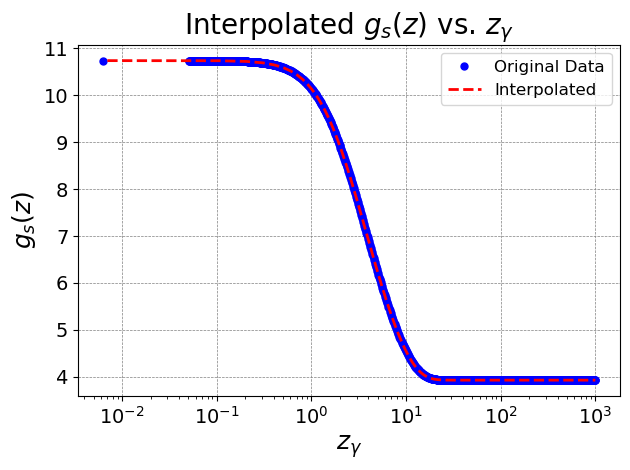

In [30]:
plt.plot(z_g,df['gs'], 'o', color='blue', markersize=5, label='Original Data')
plt.plot(x_new, ynew, '--', color='red', linewidth=2, label='Interpolated')
plt.xscale('log')
plt.xlabel(r'$z_{\gamma}$', fontsize=18)
plt.ylabel(r'$g_{s}(z)$', fontsize=18)
plt.title(r'Interpolated $g_{s}(z)$ vs. $z_{\gamma}$', fontsize=20)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

In [33]:
def gprime_iplot(f,i):
    diff=(float(f(i+10**(-4)))-float(f(i)))/(10**(-4))
    return diff

In [34]:
new_y=[]
for i in range(0,1000,1):
    if(z_g[i+1]!=z_g[i]):
        new_y.append(gprime_iplot(f,z_g[i]))
    else:
        new_y.append(new_y[i-1])
new_y.append(0.0)

In [36]:
func2=cons*((z_g**(2))*1/3*np.divide(new_y,df['gs'])+z_g)/(1.66*np.sqrt(df['g*']))

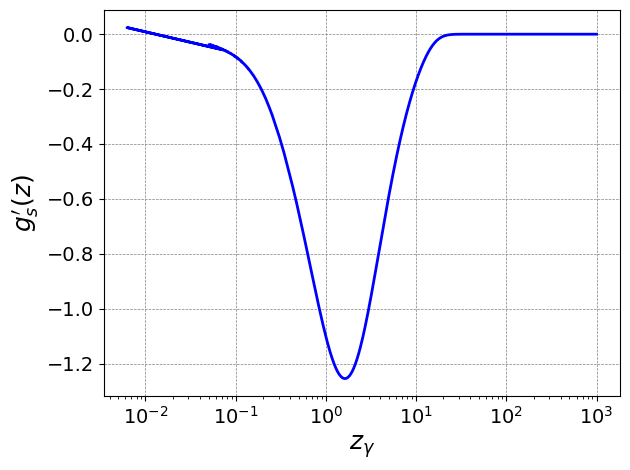

In [39]:
plt.plot(z_g, new_y, color='blue', linewidth=2)
plt.xscale('log')
plt.ylabel(r'$g^{\prime}_{s}(z)$', fontsize=18)
plt.xlabel(r'$z_\gamma$', fontsize=18)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

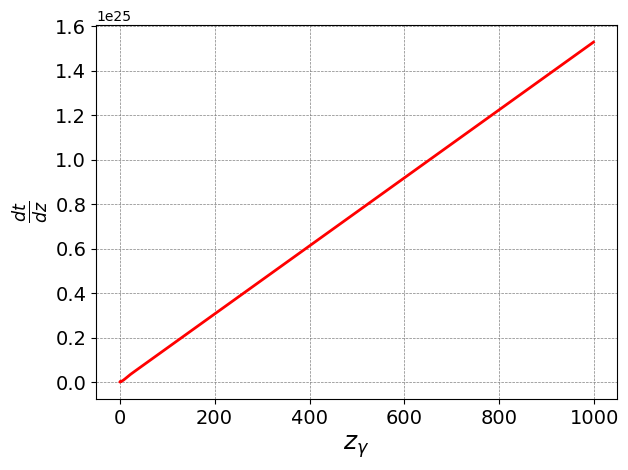

In [40]:
plt.plot(z_g, func2, color='red', linewidth=2)
plt.ylabel(r'$\frac{dt}{dz}$', fontsize=18)
plt.xlabel(r'$z_{\gamma}$', fontsize=18)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

### Solving $\frac{dt}{dz}$ for $t(z_{\gamma})$

We will adopt the following methodology to solve the differential equation:

### Given:

The differential equation is given by:

$$\frac{dt}{dz} = \frac{\left(-z^{2}\frac{1}{3}\frac{g'_{s}(z)}{g_{s}(z)}+z\right)}{1.66 \sqrt{g_{\ast}(z)}}\frac{m_{pl}}{m_{e}^{2}}$$

### Let:

Let's define a function $f(z)$ as:

$$f(z) = \frac{\left(-z^{2}\frac{1}{3}\frac{g^{\prime}_{s}(z)}{g_{s}(z)}+z\right)}{1.66 \sqrt{g_{\ast}(z)}}\frac{m_{pl}}{m_{e}^{2}}$$

We can rewrite the differential equation as:

$$\int dt = \int f(z) \, dz$$

Integrating both sides, we obtain:

$$t(z) = \int f(z) \, dz$$

To solve this equation, we will use numerical methods to approximate the integral $\int f(z) \, dz$.

This approach allows us to calculate the value of $t(z_{\gamma})$ numerically.



In [41]:
# solving for dt/dz
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

In [44]:
min(z_g)


0.00624792643863175

In [46]:
integral=cumulative_trapezoid(func2,z_g,initial=0.00624792643863175)

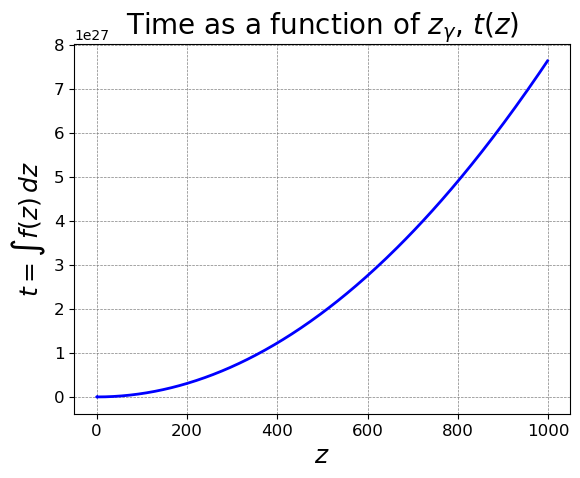

In [48]:
# Plotting
plt.plot(z_g, integral, color='blue', linewidth=2)

# Labels and title
plt.xlabel(r'$z$', fontsize=18)
plt.ylabel(r'$t = \int f(z) \, dz$', fontsize=18)
plt.title(r'Time as a function of $z_{\gamma}$, $t(z)$', fontsize=20)

# Gridlines
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Tick labels
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)